<a href="https://colab.research.google.com/github/punam35/ML-Python/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr

In [ ]:
#Create an instance of load_iris
iris = load_iris()
iris
#data-features/input
#target-label/output

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Create a Dataframe for iris
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"] = iris.target_names[iris.target]
df["Species"] = iris.target
   # to add output/feature(target) name in previous column

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0
Species,0


In [ ]:
#Using Minmax scaler
#scaler = MinMaxScaler()
#df['petal width minmax-scaled'] = scaler.fit_transform(df[['petal width (cm)']])
#df.head()

In [ ]:
#Using Custom value range for minmax scalar
#scaler_custom = MinMaxScaler(feature_range=(1, 2))
#df['petal width custom-scaled'] = scaler_custom.fit_transform(df[['petal width (cm)']])
#df.head()

In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    object 
 5   Species            149 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


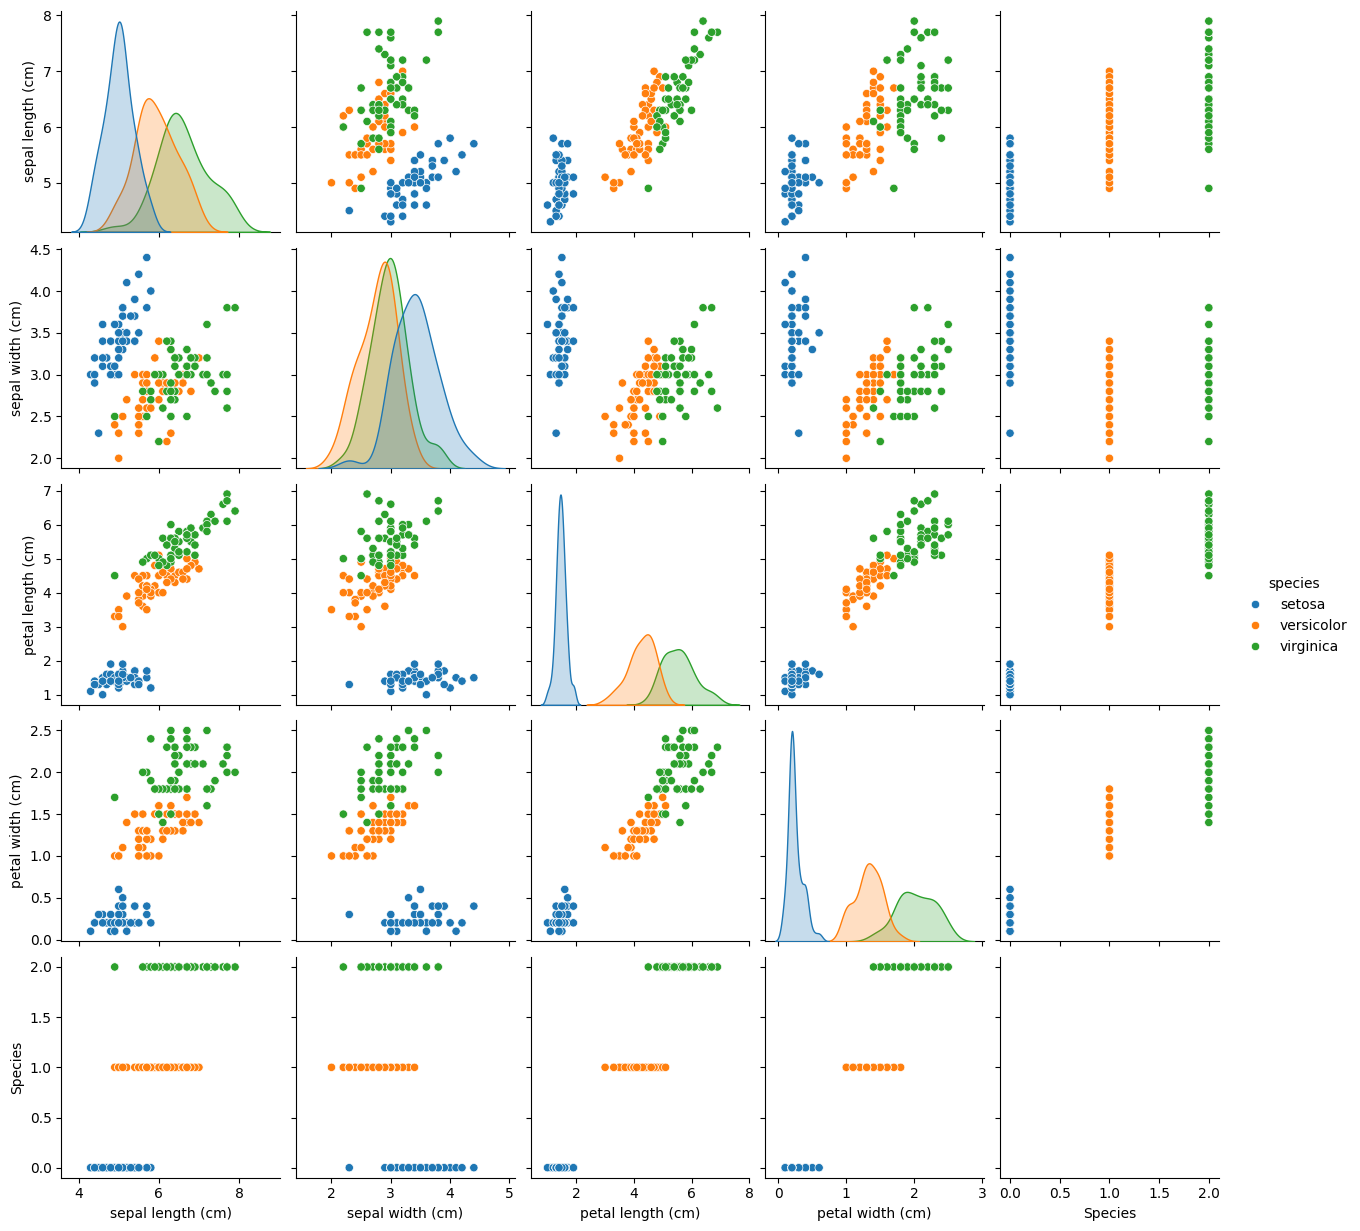

In [ ]:
sns.pairplot(df,hue="species")
plt.show()

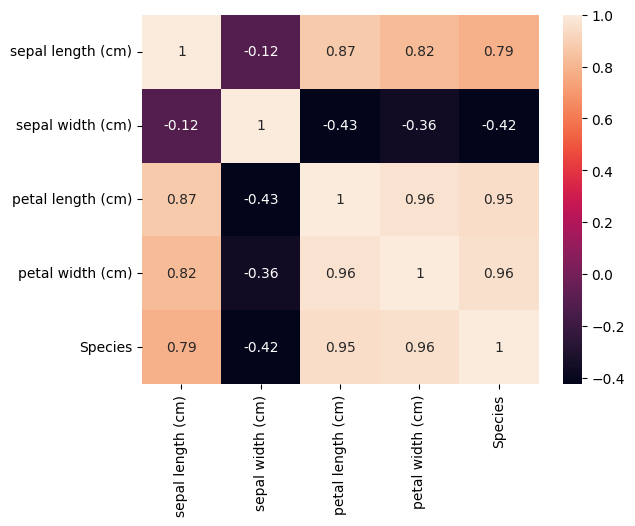

In [ ]:
#Computing correlation and presenting it in Heatmap
#corr=X.corr()
corr=df.drop("species",axis=1).corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
#PREPARING DATA For train-test split using iris
# X=iris.data
# y=iris.target
# X.shape,y.shape

In [ ]:
#PREPARING DATA For train-test split using dataframe
X=df.drop(["species","Species"],axis=1)
y=df["species"]
X.shape,y.shape

((149, 4), (149,))

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20,random_state=40)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
X.shape,X_train.shape,X_test.shape

((149, 4), (119, 4), (30, 4))

In [ ]:
y.shape,y_train.shape,y_test.shape

((149,), (119,), (30,))

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
temp=clf.predict(X_test)
temp

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
print(f"Predict:{temp}")
print(f"Actual:{y_test}")

Predict:['setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor']
Actual:38         setosa
66     versicolor
115     virginica
117     virginica
89     versicolor
135     virginica
68     versicolor
94     versicolor
84     versicolor
28         setosa
90     versicolor
11         setosa
40         setosa
126     virginica
79     versicolor
144     virginica
123     virginica
124     virginica
76     versicolor
59     versicolor
131     virginica
105     virginica
53     versicolor
17         setosa
64     versicolor
18         setosa
13         setosa
116     virginica
9          setosa
81     versicolor
Name: species, dtype: object


In [ ]:
#Calculation of Accuracy
accuracy_score(y_test, temp)

1.0

In [ ]:
cnf=confusion_matrix(y_test, temp)
cnf

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

<Axes: >

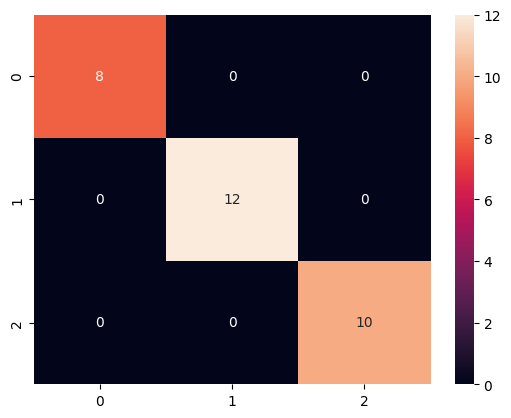

In [ ]:
#Creating heatmap for confusion matrix
sns.heatmap(cnf,annot=True)

In [ ]:
#Computing Classification report for this model
print(classification_report(y_test, temp))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



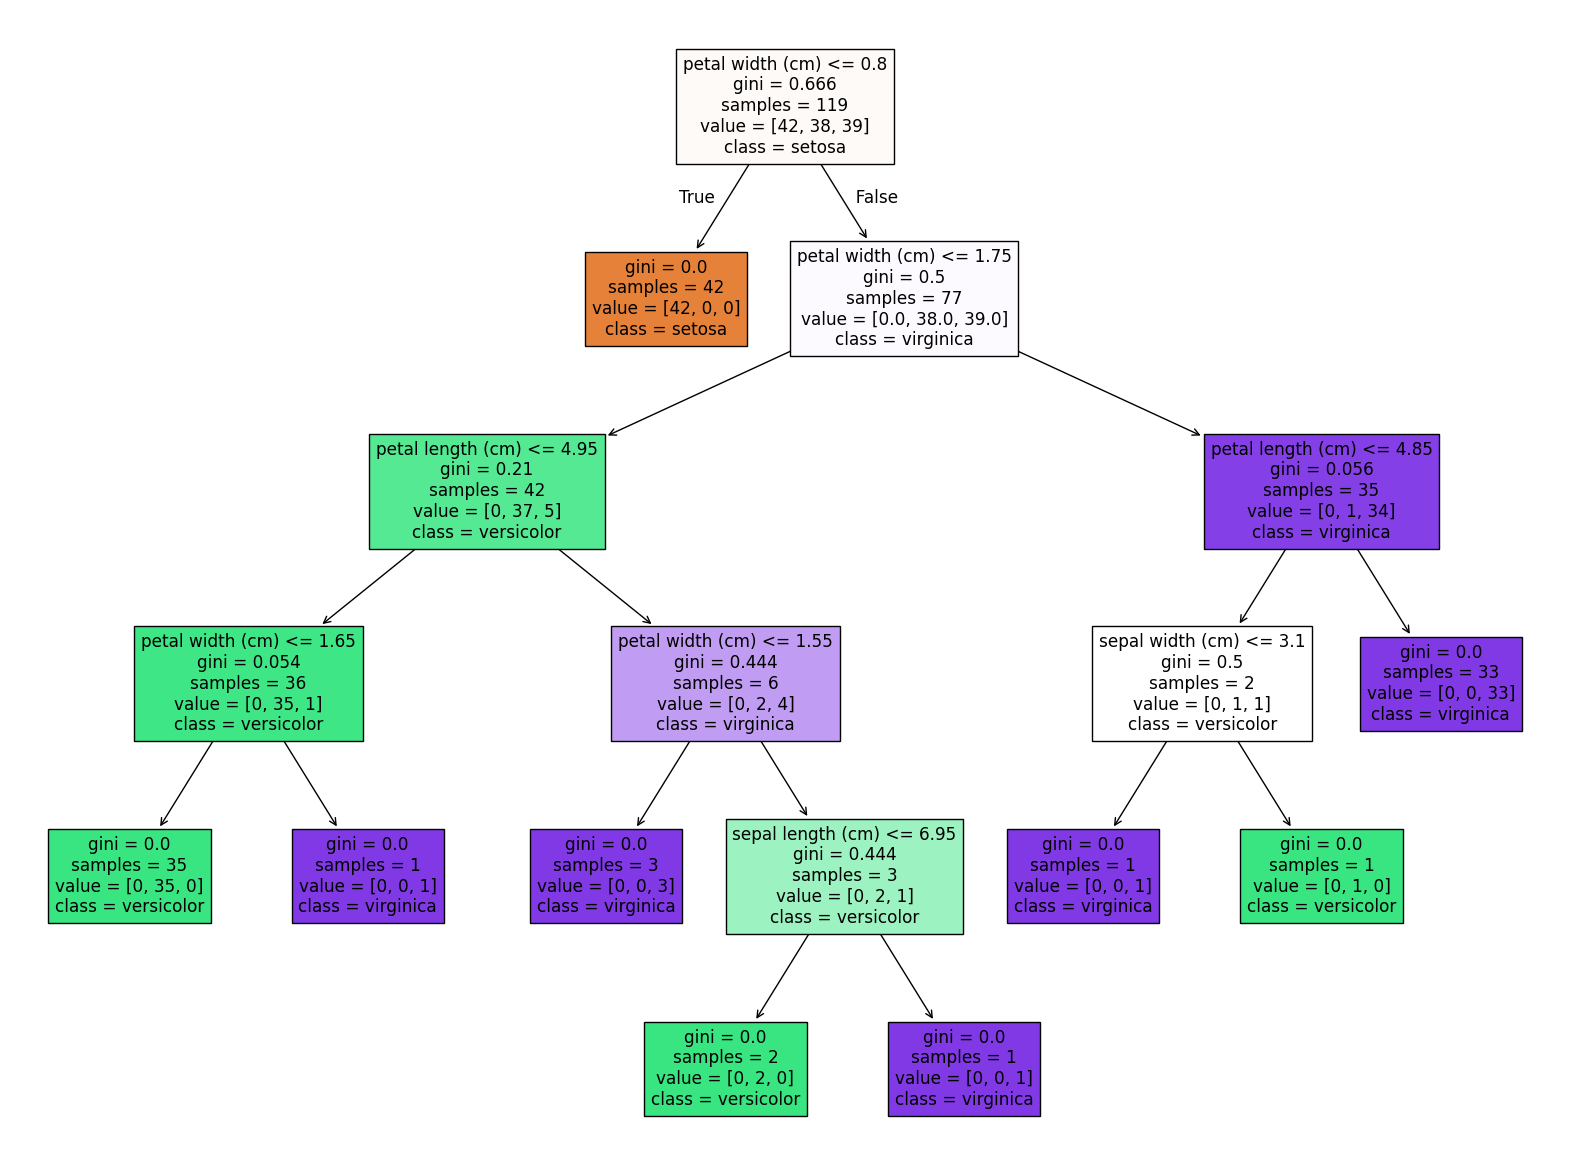

In [ ]:
#Making Decision Tree
plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=iris.target_names)
plt.show()

In [ ]:
#RandomForest
rf=RandomForestClassifier
clf.fit(X_train,y_train)
pre=clf.predict(X_test)
pre

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
print(f"Predict:{pre}")
print(f"Actual:{y_test}")

Predict:['setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor']
Actual:38         setosa
66     versicolor
115     virginica
117     virginica
89     versicolor
135     virginica
68     versicolor
94     versicolor
84     versicolor
28         setosa
90     versicolor
11         setosa
40         setosa
126     virginica
79     versicolor
144     virginica
123     virginica
124     virginica
76     versicolor
59     versicolor
131     virginica
105     virginica
53     versicolor
17         setosa
64     versicolor
18         setosa
13         setosa
116     virginica
9          setosa
81     versicolor
Name: species, dtype: object


In [ ]:
cnfm=confusion_matrix(y_test, pre)
cnfm

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

<Axes: >

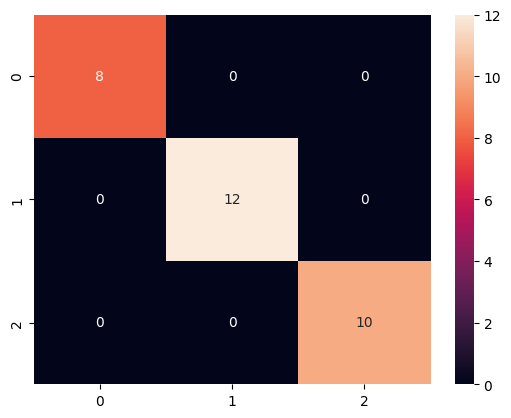

In [ ]:
sns.heatmap(cnfm,annot=True)

In [ ]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
temp=clf.predict([[6.588,2.974,5.552,2.026]])
print(f"Predict:{temp}")

Predict:['virginica']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cb32986eee28246933.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Install required libraries (Colab)
!pip install gradio scikit-learn pandas -q

# -----------------------------------------
# Import libraries
# -----------------------------------------
import gradio as gr
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# -----------------------------------------
# Load dataset & train model
# -----------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier()
model.fit(X, y)

# -----------------------------------------
# Prediction Function
# -----------------------------------------
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    data = [[sepal_length, sepal_width, petal_length, petal_width]]
    pred = model.predict(data)[0]
    species = iris.target_names[pred]
    return species

# -----------------------------------------
# Gradio UI
# -----------------------------------------
app = gr.Interface(
    fn=predict_species,
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)")
    ],
    outputs=gr.Textbox(label="Predicted Species"),
    title="Iris Flower Species Predictor",
    description="Enter the four flower measurements to predict Iris species."
)

# -----------------------------------------
# Launch the app (Colab version)
# -----------------------------------------
app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1b9e1611e6e649ceeb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
